In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [78]:
######### Without datetime

In [79]:
train = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\train.csv")
test = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\test.csv")

In [80]:
X = train.drop(["datetime","casual","registered","count"],axis=1)
X_test= test.drop("datetime",axis=1)
y = train["count"]
y1 = train["casual"]
y2 =  train["registered"]

In [81]:
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')

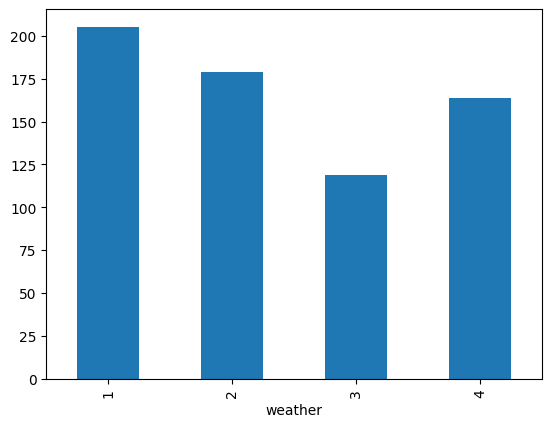

In [82]:
train.groupby("weather")["count"].mean().plot(kind='bar')
plt.show()

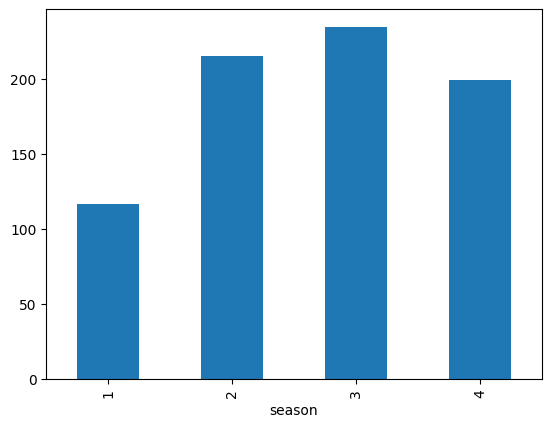

In [83]:
train.groupby("season")["count"].mean().plot(kind='bar')
plt.show()

In [84]:
##### CatRegressor with season and weather as categorical data

In [85]:
cat =  CatBoostRegressor(random_state=24,logging_level="Silent",cat_features=["season","weather"])
cat.fit(X,y)
y_pred = cat.predict(X_test)
y_pred[y_pred<0]=0
submit = pd.DataFrame({"datetime":test["datetime"],"count":y_pred})
submit.to_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\cat.csv",index=False)

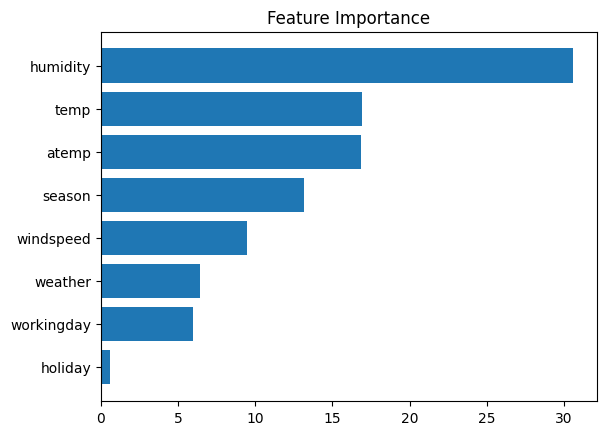

In [87]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":cat.feature_importances_})
df_imp.sort_values("Importance",inplace=True)
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance")
plt.show()

In [91]:
##### CatRegressor with season and weather as numerical/ordinal data

In [92]:
cat =  CatBoostRegressor(random_state=24,logging_level="Silent")
cat.fit(X,y)
y_pred = cat.predict(X_test)
y_pred[y_pred<0]=0
submit = pd.DataFrame({"datetime":test["datetime"],"count":y_pred})
submit.to_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\cat_ordinal.csv",index=False)

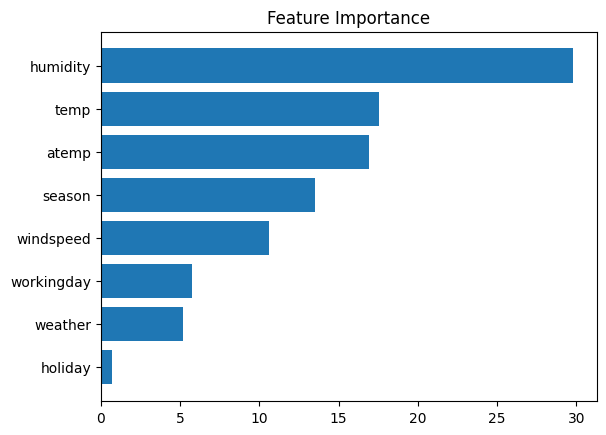

In [93]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":cat.feature_importances_})
df_imp.sort_values("Importance",inplace=True)
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance")
plt.show()

In [ ]:
##### RandomForest 

In [94]:
rf = RandomForestRegressor(random_state=24)
rf.fit(X,y)
y_pred = rf.predict(X_test)
y_pred[y_pred<0]=0
submit = pd.DataFrame({"datetime":test["datetime"],"count":y_pred})
submit.to_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\rf.csv",index=False)

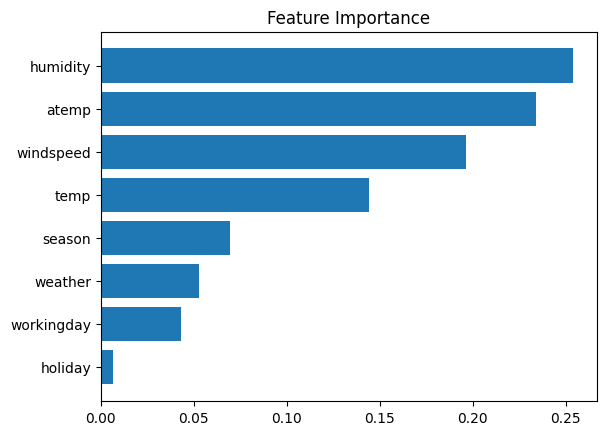

In [95]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":rf.feature_importances_})
df_imp.sort_values("Importance",inplace=True)
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance")
plt.show()

In [25]:
##### Not good results hence analysing data

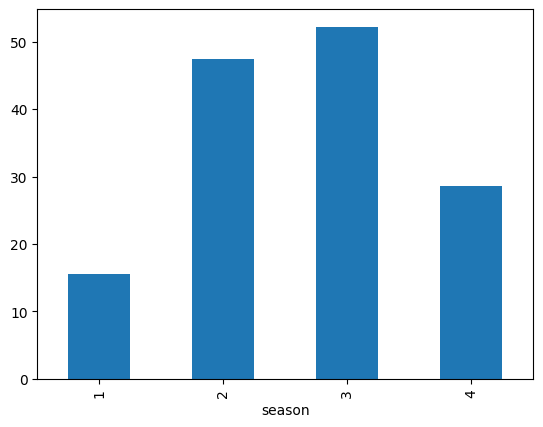

In [19]:
train.groupby("season")["casual"].mean().plot(kind='bar')
plt.show()

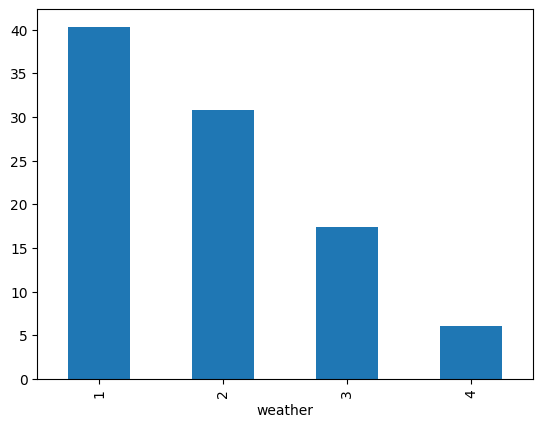

In [20]:
train.groupby("weather")["casual"].mean().plot(kind='bar')
plt.show()

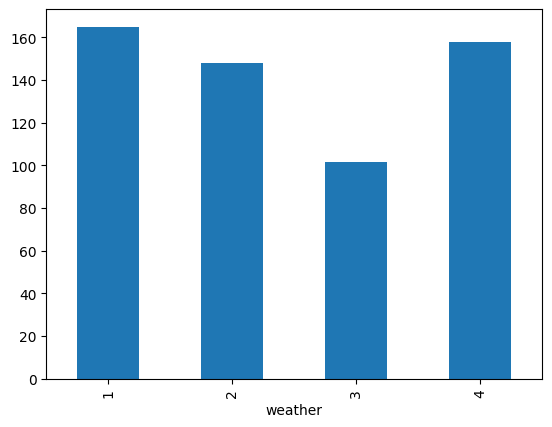

In [22]:
train.groupby("weather")["registered"].mean().plot(kind='bar')
plt.show()

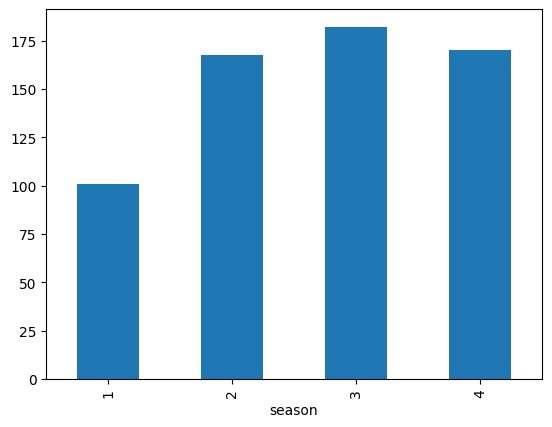

In [24]:
train.groupby("season")["registered"].mean().plot(kind='bar')
plt.show()

In [ ]:
### 2 different models for cat

In [96]:
### casual ---> cat model
cat1 =  CatBoostRegressor(random_state=24,logging_level="Silent",cat_features=["season","weather"])
cat1.fit(X,y1)
y_pred_1 = cat1.predict(X_test)
y_pred_1[y_pred_1<0]=0

### registered ---> cat model
cat2 =  CatBoostRegressor(random_state=24,logging_level="Silent",cat_features=["season","weather"])
cat2.fit(X,y2)
y_pred_2 = cat2.predict(X_test)
y_pred_2[y_pred_2<0]=0

#### count
y_pred = y_pred_1+y_pred_2
submit = pd.DataFrame({"datetime":test["datetime"],"count":y_pred})
submit.to_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\cat_cas_reg.csv",index=False)

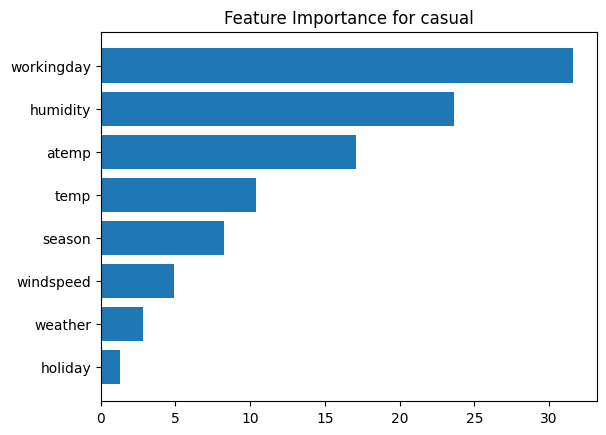

In [97]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":cat1.feature_importances_})
df_imp.sort_values("Importance",inplace=True)
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance for casual")
plt.show()

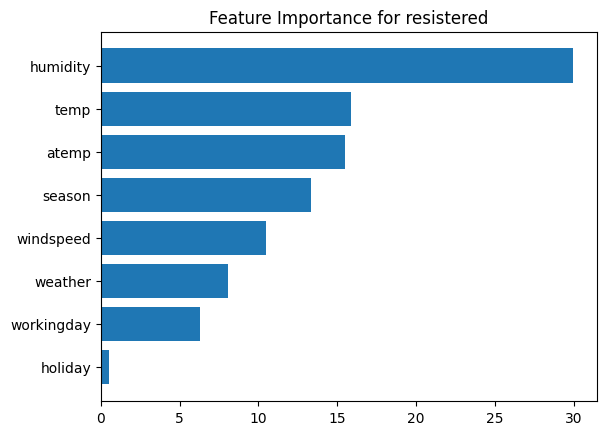

In [98]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":cat2.feature_importances_})
df_imp.sort_values("Importance",inplace=True)
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance for resistered")
plt.show()

In [ ]:
###### Using Datetime

In [99]:
df_train = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\train.csv"
                 ,parse_dates=['datetime'])
df_test = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\test.csv"
                 ,parse_dates=['datetime'])

In [100]:
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['weekday'] = df_train['datetime'].dt.weekday

df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['hour'] = df_test['datetime'].dt.hour
df_test['weekday'] = df_test['datetime'].dt.weekday

<Axes: xlabel='hour', ylabel='casual'>

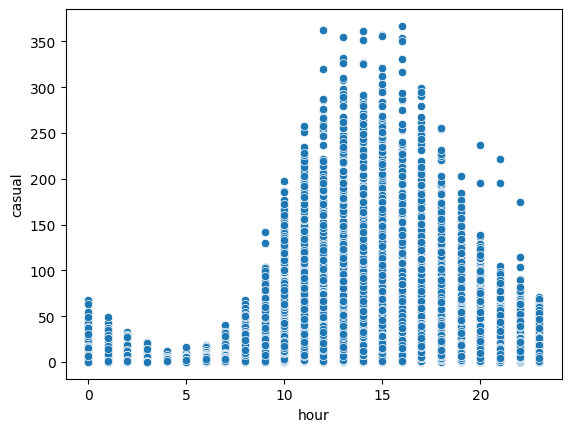

In [101]:
sns.scatterplot(data=df_train,x='hour',y='casual')

<Axes: xlabel='hour', ylabel='registered'>

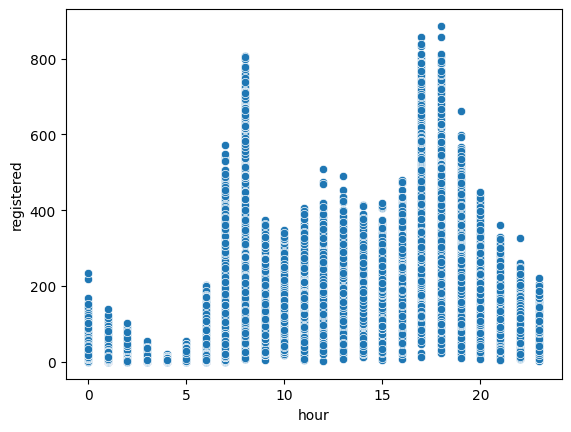

In [102]:
sns.scatterplot(data=df_train,x='hour',y='registered')

<Axes: xlabel='weekday', ylabel='casual'>

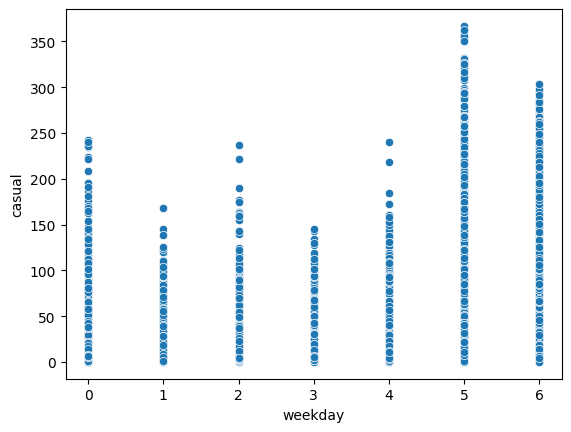

In [103]:
sns.scatterplot(data=df_train,x='weekday',y='casual')

<Axes: xlabel='weekday', ylabel='registered'>

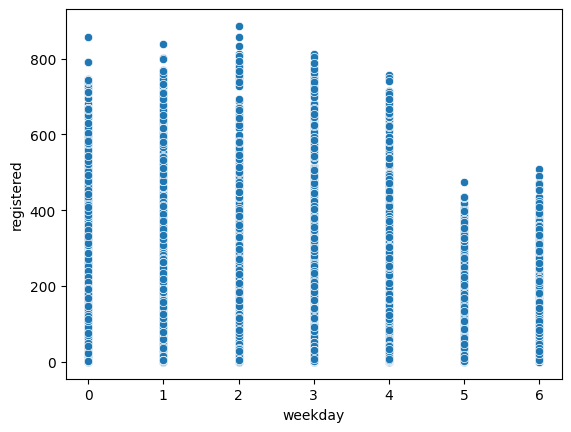

In [104]:
sns.scatterplot(data=df_train,x='weekday',y='registered')

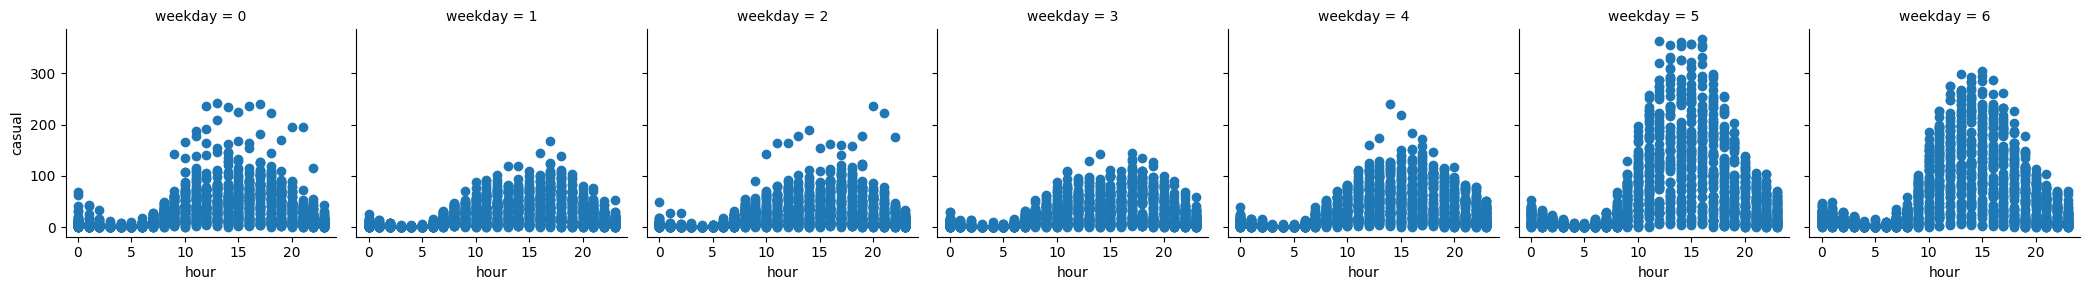

In [105]:
g = sns.FacetGrid(df_train , col = 'weekday')
g.map(plt.scatter, 'hour','casual')
plt.show()

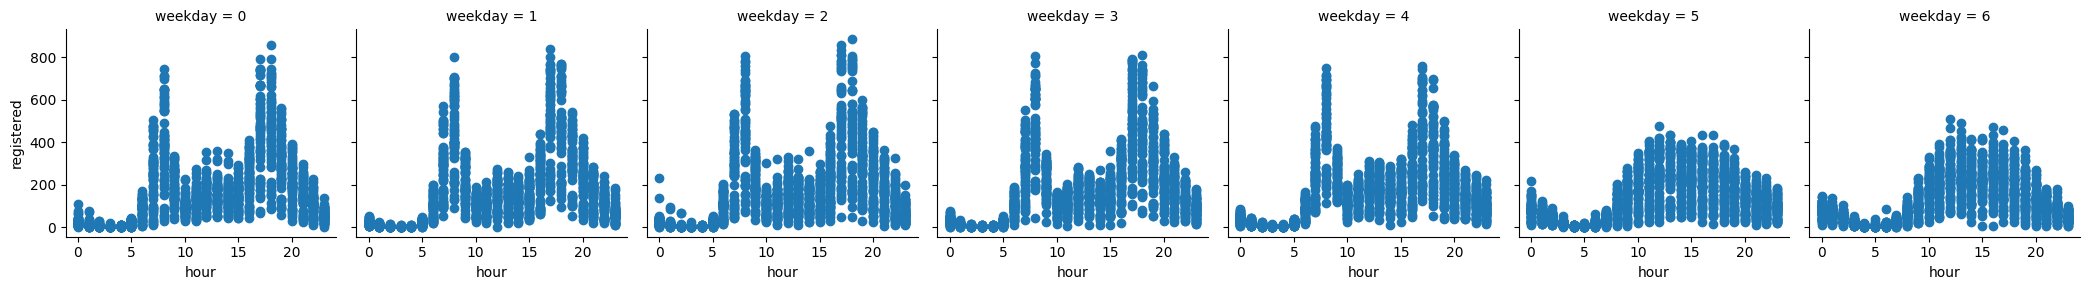

In [106]:
g = sns.FacetGrid(df_train , col = 'weekday')
g.map(plt.scatter, 'hour','registered')
plt.show()

In [107]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


In [108]:
X = df_train.drop(["datetime","casual","registered","count"],axis=1)
y = df_train["count"]
y1 = df_train["casual"]
y2 =  df_train["registered"]

X_test= df_test.drop("datetime",axis=1)

In [109]:
### 2 different models for cat with datetime

In [110]:
### casual ---> cat model
cat1 =  CatBoostRegressor(random_state=24,logging_level="Silent",cat_features=["season","weather",'weekday','hour'])
cat1.fit(X,y1)
y_pred_1 = cat1.predict(X_test)
y_pred_1[y_pred_1<0]=0

### registered ---> cat model
cat2 =  CatBoostRegressor(random_state=24,logging_level="Silent",cat_features=["season","weather",'weekday','hour'])
cat2.fit(X,y2)
y_pred_2 = cat2.predict(X_test)
y_pred_2[y_pred_2<0]=0

#### count
y_pred = y_pred_1+y_pred_2
submit = pd.DataFrame({"datetime":df_test["datetime"],"count":y_pred})
submit.to_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\cat_cas_reg_datetime.csv",index=False)

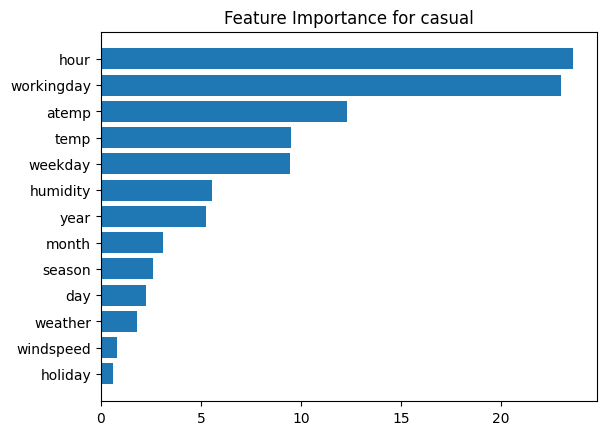

In [111]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":cat1.feature_importances_})
df_imp.sort_values("Importance",inplace=True)
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance for casual")
plt.show()

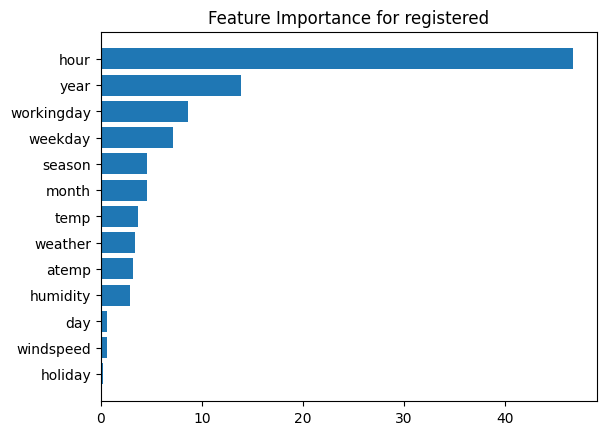

In [112]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":cat2.feature_importances_})
df_imp.sort_values("Importance",inplace=True)
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance for registered")
plt.show()